In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, 'path_to_the GANs package')
from GANs import utils

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
# from numpy import vstack
from keras.utils import load_img, img_to_array
# from numpy import savez_compressed

In [7]:
data_dir = 'path to the data cityscapes'
train_path = os.path.join(data_dir, 'train')
val_path = os.path.join(data_dir, 'val')

# load all images in a directory into memory
def load_images(path, size=(256,512)):
    src_list, tar_list = list(), list()
    # enumerate filenames in directory, assume all are images
    for filename in os.listdir(path):
        # load and resize the image
        pixels = load_img(os.path.join(path, filename), target_size=size)
        # convert to numpy array
        pixels = img_to_array(pixels)
        # split into satellite and map
        sat_img, map_img = pixels[:, :256], pixels[:, 256:]
        src_list.append(sat_img)
        tar_list.append(map_img)
    return [np.asarray(src_list), np.asarray(tar_list)]

[src_img, tar_img] = load_images(train_path)
[val_src_img, val_tar_img] = load_images(val_path)
print('Loaded: ', src_img.shape, tar_img.shape)
print('Loaded: ', val_src_img.shape, val_tar_img.shape)

Loaded:  (2975, 256, 256, 3) (2975, 256, 256, 3)
Loaded:  (500, 256, 256, 3) (500, 256, 256, 3)


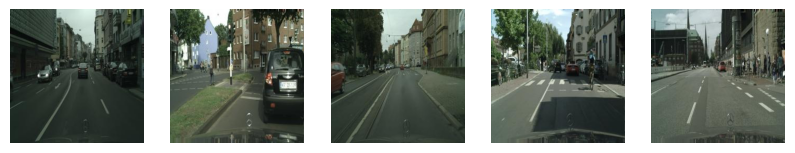

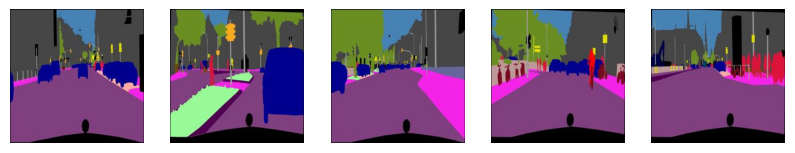

In [11]:
idxA = np.random.randint(0, len(src_img), 5)

plt.figure(figsize=(10,5))
for i, idx in enumerate(idxA):
    plt.subplot(1, 5, 1 + i)
    plt.axis('off')
    plt.imshow(src_img[idx].astype('uint8'))
plt.show()
plt.figure(figsize=(10,5))
for i, idx in enumerate(idxA):
    plt.subplot(1, 5, 1 + i)
    plt.axis('off')
    plt.imshow(tar_img[idx].astype('uint8'))
plt.show()

In [12]:
src_img = utils.scale_data(src_img)
tar_img = utils.scale_data(tar_img)

In [16]:
from GANs.pix2pix import models
# define image shape
img_shape = src_img.shape[1:]
# define the models
disc = models.build_discriminator(img_shape)
gene = models.build_generator(img_shape)
# define the composite model
p2p_model = models.build_pix2pix(gene, disc, img_shape)
models.train_pix2pix(gene, disc, p2p_model, src_img, tar_img, summary_interval=2)

In [21]:
from keras.models import load_model
model = load_model('path to your saved model Src2Tar_after_xxxx.h5')

In [26]:
def plot_src_gen_tar(src, tar, gen_model, sample_size=5):
    idx = np.random.randint(0, len(src), sample_size)
    
    sel_src = src[idx]
    scaled_src = (sel_src - 127.5) / 127.5
    sel_tar = tar[idx]
    gen = gen_model.predict(scaled_src)
    gen = (gen + 1) / 2.0
    
    
    fig, axes = plt.subplots(3, sample_size, figsize=(10, 7))
    
    for i in range(sample_size):
        axes[0, i].imshow(sel_src[i].astype('uint8'))
        axes[0, i].set_title('Source Image')
        axes[0, i].axis('off')
        
        axes[1, i].imshow(gen[i])
        axes[1, i].set_title('Generated Image')
        axes[1, i].axis('off')
        
        axes[2, i].imshow(sel_tar[i].astype('uint8'))
        axes[2, i].set_title('Target Image')
        axes[2, i].axis('off')
    
    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 18ms/step


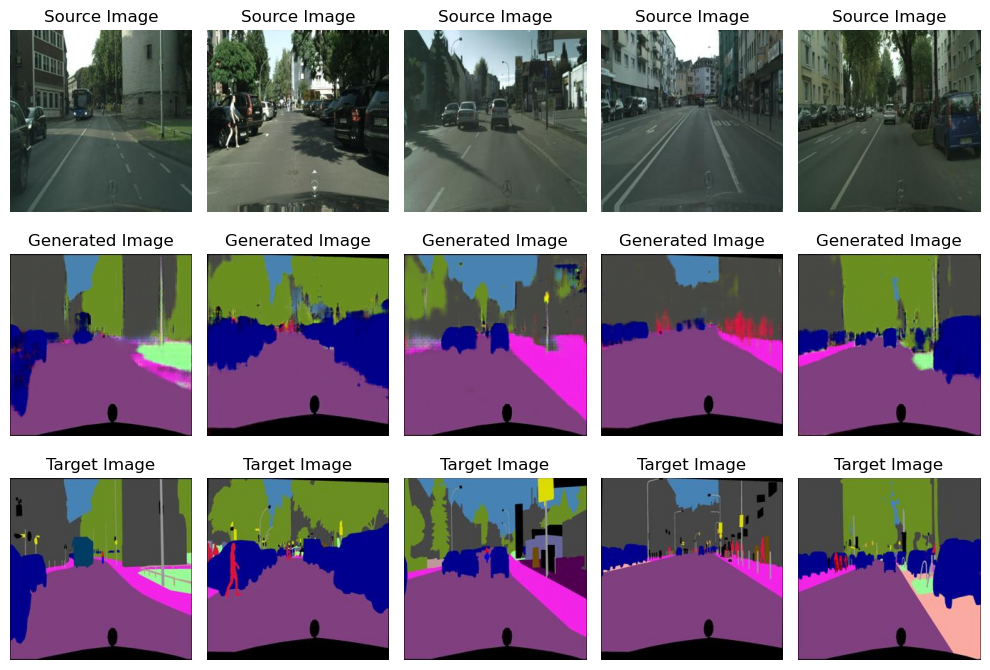

In [27]:
plot_src_gen_tar(val_src_img, val_tar_img, model)